# Assignment 1

* Student Name:  Zixin Hao
* Student ID:  *******
* Tutorial Code:  05-P1
* Tutor:  **** and *******

# Task 1:
Data cleansing.
Please use the following cells to read the two data files, clean and integrate them. You can add/delete cells as many as required to the following cells.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.1 Read these data

In [2]:
CovidData = pd.read_csv('Covid-data.csv')
CovidData.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population
0,Australia,2019-12-31,0.0,0.0,0.0,0.0,44648.71,25499881.0
1,Australia,2020-01-01,0.0,0.0,0.0,0.0,44648.71,25499881.0
2,Australia,2020-01-02,0.0,0.0,0.0,0.0,44648.71,25499881.0
3,Australia,2020-01-03,0.0,0.0,0.0,0.0,44648.71,25499881.0
4,Australia,2020-01-04,0.0,0.0,0.0,0.0,44648.71,25499881.0


In [3]:
Lockdown = pd.read_csv('CountryLockdowndates.csv')
Lockdown.head()

,Country/Region,Province,Date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


## 1.2 check these data

In [4]:
CovidData.info()
print("~"*100)
CovidData.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        1575 non-null   object 
 1   date            1575 non-null   object 
 2   total_cases     1575 non-null   float64
 3   new_cases       1575 non-null   float64
 4   total_deaths    1569 non-null   float64
 5   new_deaths      1568 non-null   float64
 6   gdp_per_capita  1575 non-null   float64
 7   population      1575 non-null   float64
dtypes: float64(6), object(2)
memory usage: 98.6+ KB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


location          0
date              0
total_cases       0
new_cases         0
total_deaths      6
new_deaths        7
gdp_per_capita    0
population        0
dtype: int64

#In CovidData.csv, column4(total_deaths) and 5(new_deaths) have some missing values

In [5]:
Lockdown.info()
print("~"*100)
Lockdown.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  307 non-null    object
 1   Province        129 non-null    object
 2   Date            230 non-null    object
 3   Type            307 non-null    object
 4   Reference       238 non-null    object
dtypes: object(5)
memory usage: 12.1+ KB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Country/Region      0
Province          178
Date               77
Type                0
Reference          69
dtype: int64

#In Lockdown.csv, column1(Province),column2(Date) and column4(Reference) have missing values

# 2.1 Cleaning the data in CovidData.csv

#cleaning first column in CovidData.csv
##remove the places that is front of the names,rename a consistent name for one country

In [6]:
print('before fixing: ',CovidData['location'].unique())
CovidData['location']=CovidData['location'].str.strip()
CovidData['location']=CovidData['location'].str.capitalize()

CovidData['location2']=CovidData['location']
CovidData.loc[CovidData['location'] =='Unitedkingdom','location2']='United Kingdom'
CovidData.loc[CovidData['location'] =='United kingdom','location2']='United Kingdom'
CovidData.loc[CovidData['location'] =='Itly','location2']='Italy'
CovidData.loc[CovidData['location'] =='United stats','location2']='United States'
CovidData.loc[CovidData['location'] =='United states','location2']='United States'
CovidData['location']=CovidData['location2']
Codata=CovidData.drop(labels='location2',axis=1)

print('after fixing: ',Codata['location'].unique())

before fixing:  ['Australia' 'Australia  ' 'China' ' China' 'France' 'Iran' 'iran' 'Italy'
 'Itly' 'Spain' 'United Kingdom' 'UnitedKingdom' 'United States'
 'United Stats']
after fixing:  ['Australia' 'China' 'France' 'Iran' 'Italy' 'Spain' 'United Kingdom'
 'United States']


#cleaning the second column of the data.

In [7]:
Codata.date.dtypes

dtype('O')

#make the date more appropriate-->exchange the day with month for some wrong date

In [8]:

def splitTime(date):
    List=[]
    
    for value in date:
        dateStr = value.split('-')
        b = [int(x) for x in dateStr]
        if b[1]>12:
            b[1],b[2]=b[2],b[1]
        c = [str(y) for y in b]    
        dateStr2=c[0]+"-"+c[1]+"-"+c[2]
        List.append(dateStr2)
    dateSer=pd.Series(List)
    return dateSer


In [9]:
print('Before:  \n','~'*100,'\n',Codata.date.tail())
Codata.loc[:,'date']=splitTime(Codata.loc[:,'date'])
print('After:  \n','~'*100,'\n',Codata.date.tail())


Before:  
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 1570    2020-07-10
1571    2020-07-11
1572    2020-07-12
1573    2020-13-07
1574    2020-14-07
Name: date, dtype: object
After:  
 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
 1570    2020-7-10
1571    2020-7-11
1572    2020-7-12
1573    2020-7-13
1574    2020-7-14
Name: date, dtype: object


##check if the date has been fixed, and at the same time change its data type

In [10]:
Codata.date=pd.to_datetime(Codata.loc[:,'date'],format= '%Y/%m/%d',errors='coerce')
Codata.date.unique()
# no NaT means fixing is sucessful

array(['2019-12-31T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
       '2020-01-18T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
       '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27

#cleaning the rest columns and change their datatype

In [11]:

Codata.new_cases=abs(Codata.new_cases)
Codata.new_deaths=abs(Codata.new_deaths)
print(Codata[Codata['new_deaths']<0])
print(Codata[Codata['new_cases']<0])

Empty DataFrame
Columns: [location, date, total_cases, new_cases, total_deaths, new_deaths, gdp_per_capita, population]
Index: []
Empty DataFrame
Columns: [location, date, total_cases, new_cases, total_deaths, new_deaths, gdp_per_capita, population]
Index: []


In [12]:
#change these columns' datatype
Codata.loc[:,'total_cases']= Codata.total_cases.astype('int')
Codata.loc[:,'new_cases']= Codata.new_cases.astype('int')

Codata.total_deaths.fillna(method='bfill',inplace=True) #fill the missing value
np.set_printoptions(suppress=True)   #fix it from scientific notation to integer(we can check if there are other questions in integer form)                   
Codata.loc[:,'total_deaths']= Codata.total_deaths.astype('int')

Codata.new_deaths.fillna(method='bfill',inplace=True)
Codata.loc[:,'new_deaths']= Codata.new_deaths.astype('int')

In [13]:
Codata.gdp_per_capita.unique() #values are resonable

array([44648.71 , 15308.712, 38605.671, 19082.62 , 35220.084, 34272.36 ,
       39753.244, 54225.446])

In [14]:
Codata.population.unique()#values are resonable

array([2.54998810e+07, 1.43932377e+09, 6.52735120e+07, 8.39929530e+07,
       6.04618280e+07, 4.67547830e+07, 6.78860040e+07, 3.31002647e+08])

# 2.2 cleaning data in CountryLockdowndates.csv

## 2.2.1

In [15]:
#change a appropriate name for lockdown date in Lockdown.csv
Lockdown.rename(columns={'Date':'lockdown_date','Country/Region':'location'},inplace=True)
Lockdown.head()


,location,Province,lockdown_date,Type,Reference
0,Afghanistan,NaN,24/03/2020,Full,https://www.thestatesman.com/world/afghan-govt...
1,Albania,NaN,08/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
2,Algeria,NaN,24/03/2020,Full,https://www.garda.com/crisis24/news-alerts/325...
3,Andorra,NaN,16/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...
4,Angola,NaN,24/03/2020,Full,https://en.wikipedia.org/wiki/2020_coronavirus...


## 2.2.2 province column

In [16]:
# fill the empty value that we cannot guess what it is
# before fixing it, they are NaN.
Lockdown['Province']=Lockdown.Province.fillna('Not Given')
Lockdown['Province'].head()

0    Not Given
1    Not Given
2    Not Given
3    Not Given
4    Not Given
Name: Province, dtype: object

## 2.2.4 Type and Reference column

In [17]:
print('Lockdown.Type.unique():',Lockdown.Type.unique())
Lockdown['Reference']=Lockdown.Reference.fillna('Not Given')
Lockdown[5:9]['Reference']

Lockdown.Type.unique(): ['Full' 'None' 'Partial']


5                                            Not Given
6    https://www.bloomberg.com/news/articles/2020-0...
7             https://www.azatutyun.am/a/30506939.html
8    https://en.wikipedia.org/wiki/2020_coronavirus...
Name: Reference, dtype: object

## 2.2.3 lockdown_date column

In [18]:
#change a appropriate datatype for 'date' columns in Lockdown.csv
#will fix the missing value in lockdown_date later
Lockdown.lockdown_date = pd.to_datetime(Lockdown.lockdown_date,format= '%d/%m/%Y',errors='ignore')
print(Lockdown.lockdown_date.dtype)

datetime64[ns]


## Consider the earliest date as the lockdown data for a country

In [19]:

newtable=Lockdown[['location','lockdown_date']]
table2 = newtable.groupby('location').min()
table2=table2.reset_index()

#fix the US(name), make them cosistent
table2['location2']=table2['location']
table2.loc[table2['location'] =='US','location2']='United States'
table2['location']=table2['location2']
table2=table2.drop(labels='location2',axis=1)



# 2.3 combine these two dataframes

In [20]:
totalData=pd.merge(Codata,table2,on=['location'],how='left')
totalData

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.710,25499881.0,2020-03-24
1,Australia,2020-01-01,0,0,0,0,44648.710,25499881.0,2020-03-24
2,Australia,2020-01-02,0,0,0,0,44648.710,25499881.0,2020-03-24
3,Australia,2020-01-03,0,0,0,0,44648.710,25499881.0,2020-03-24
4,Australia,2020-01-04,0,0,0,0,44648.710,25499881.0,2020-03-24
...,...,...,...,...,...,...,...,...,...
1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647.0,2020-03-13
1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647.0,2020-03-13
1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647.0,2020-03-13
1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647.0,2020-03-13


In [21]:
totalData['lockdown_date']=totalData.lockdown_date.fillna('Not Given')
totalData.loc[:,'lockdown_date']= pd.to_datetime(totalData.loc[:,'lockdown_date'],errors='coerce')
print(totalData.lockdown_date.dtype)



datetime64[ns]


In [22]:
totalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   location        1575 non-null   object        
 1   date            1575 non-null   datetime64[ns]
 2   total_cases     1575 non-null   int32         
 3   new_cases       1575 non-null   int32         
 4   total_deaths    1575 non-null   int32         
 5   new_deaths      1575 non-null   int32         
 6   gdp_per_capita  1575 non-null   float64       
 7   population      1575 non-null   float64       
 8   lockdown_date   1575 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int32(4), object(1)
memory usage: 98.4+ KB



<h1 style="color:red;font-size:20px;">You need to export a data set which contains infomration of the cleaned cronavirus dataset as well as the lockdown date as the last step of task 1 in the following cell.</h1>  

Please use dataframename.to_csv('<student_ID>_Task1DataSet.csv', index=False) to export your cleansed and integrated dataset. If your student Id is 1234, you should export the file with the following code

In [23]:
totalData.to_csv('Task1DataSet.csv',index=False)

# Task 2: 

### Question 1.	
Create a line chart to show the trend of the daily number of new cases for each country and explore the result of visualisation (Create one line chart for each country). 

### a little exploration of each country is below every chart

In [24]:
Data = pd.read_csv('Task1DataSet.csv')
Data


,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.710,25499881.0,2020-03-24
1,Australia,2020-01-01,0,0,0,0,44648.710,25499881.0,2020-03-24
2,Australia,2020-01-02,0,0,0,0,44648.710,25499881.0,2020-03-24
3,Australia,2020-01-03,0,0,0,0,44648.710,25499881.0,2020-03-24
4,Australia,2020-01-04,0,0,0,0,44648.710,25499881.0,2020-03-24
...,...,...,...,...,...,...,...,...,...
1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647.0,2020-03-13
1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647.0,2020-03-13
1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647.0,2020-03-13
1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647.0,2020-03-13


Text(0.5, 1.0, 'The trend of the daily number of new cases for Australia')

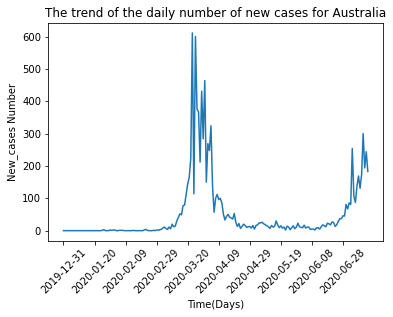

In [25]:
Aus = Data[Data['location']=='Australia']
plt.plot(Aus.date,Aus.new_cases)
plt.xticks(Aus.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Australia')

#From 2019-12-31 to early march, there are no new_cases.At least not found.
#And then, it suddenly burst up to about 600new_cases one day.

At the beginning, we did not pay attention to the epidemic and did not prevent it. And Australia excutes a selective travel restriction, barring only nationals from Iran, South Korea and Italy. which led to the peak value. However, due to the advanced medical technology and small population in Australia, the epidemic was quickly brought under control by the quarantine policy.

People began to let down their guard and unknown infections appeared in Victoria, but the second wave was brought under control by a state lockdown four for several weeks.


Text(0.5, 1.0, 'The trend of the daily number of new cases for China')

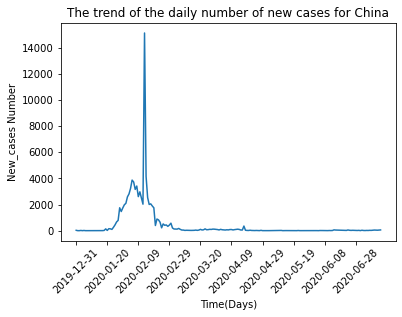

In [26]:
Ch = Data[Data['location']=='China']
plt.plot(Ch.date,Ch.new_cases)
plt.xticks(Ch.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for China')

For the extreme value:

    * reason one:
    In China, the first discovery area is Wuhan.
    all over the country, there are medical teams rushed to Hubei, rushed to Wuhan to support.
    So this speeds up the process of identifying suspected cases.
    All of the people who hadn't been diagnosed before  had a chance to see a doctor, all of them had a chance to be diagnosed.
    * reson two:
    according to the criteria of clinical diagnosis, there are a large proportion of suspected cases (which can be regarded as confirmed cases). Starting that day, Hubei will publish the number of clinical cases included in the number of confirmed cases.
    So, that's why Wuhan suddenly has so many cases.

Text(0.5, 1.0, 'The trend of the daily number of new cases for France')

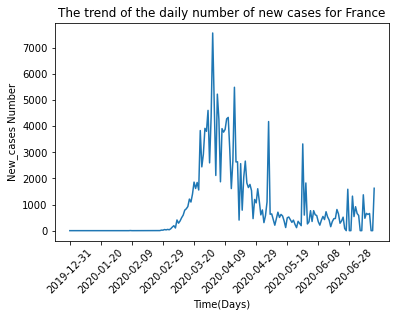

In [27]:
France = Data[Data['location']=='France']
plt.plot(France.date,France.new_cases)
plt.xticks(France.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for France')

This trend is relatively normal, and people are not vigilant enough to pay attention to epidemic prevention and control.
Uneven values that sometimes go up and somtimes go down rapidly.The reason maybe France's policy of blockade may make the movement and movement of people cyclical.(For example )(France wanted to avoid as many blockdown as possible)

Text(0.5, 1.0, 'The trend of the daily number of new cases for Iran')

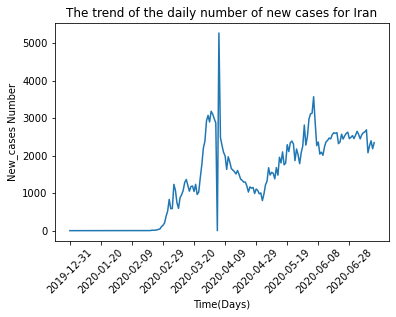

In [28]:
Iran = Data[Data['location']=='Iran']
plt.plot(Iran.date,Iran.new_cases)
plt.xticks(Iran.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Iran')

The number of cases reported in Iran may represent only about 20% of the real number until more tests could be conducted.So, I think these two extreme value are no special meaning,after all, it doesn't have any record online.(if there are something happends,it will be recorded because 0 to 5000 is so amazing strange)So, recently, consider a statistical error.

Social distancing and hygiene rules are not observed, and there are no strict government restrictions(Authorities seem reluctant to impose lockdown). there is the reasons for two rebounds in the country.

#reference:https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Iran
https://www.bbc.com/news/world-middle-east-52903443

Text(0.5, 1.0, 'The trend of the daily number of new cases for Italy')

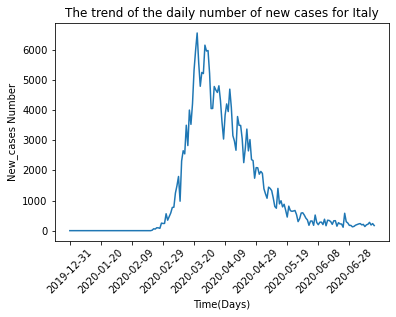

In [29]:
Italy = Data[Data['location']=='Italy']
plt.plot(Italy.date,Italy.new_cases)
plt.xticks(Italy.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Italy')


For these small rebound,Their health systems were on the verge of collapse, and their detection capabilities were intermittent.

#https://www.tellerreport.com/news/2020-08-15-italy-s-new-crown-epidemic-rebound-report--there-are-925-active-virus-infection-chains.HJu4sefSzD.html


Text(0.5, 1.0, 'The trend of the daily number of new cases for ASpain')

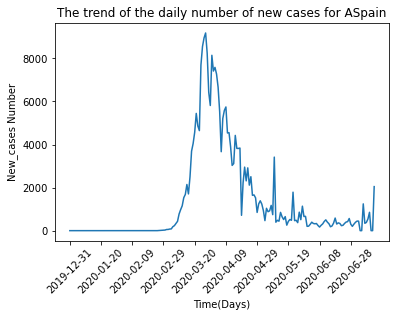

In [30]:
Spain = Data[Data['location']=='Spain']
plt.plot(Spain.date,Spain.new_cases)
plt.xticks(Spain.date[::20],rotation=45)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for ASpain')


Under lockdown policies, as well as other effective measures,trend is normal.Like this line chart, the tend to decline after reaching a peak.

Text(0.5, 1.0, 'The trend of the daily number of new cases for United Kingdom')

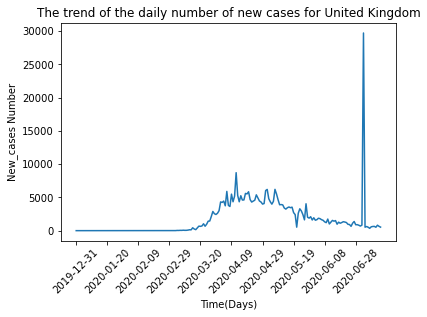

In [31]:

UK= Data[Data['location']=='United Kingdom']
plt.plot(UK.date,UK.new_cases)
plt.xticks(UK.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for United Kingdom')

The number is no meaning that is up to 30,000 at the end of June, it originally is -30,000, I changed it to 30,000 because I took it into consider that minus might be recorded just by mistake.But I found,actually,it doesn't have the extreme large value in official recording online. So, consider it as a error.
#reference:https://www.dailymail.co.uk/news/article-8654045/Scotland-sees-highest-rise-Covid-infections-three-months-123-new-cases.html

Text(0.5, 1.0, 'The trend of the daily number of new cases for United States')

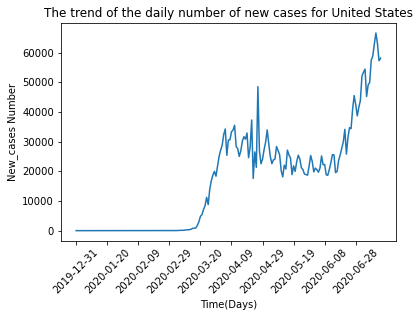

In [32]:
US= Data[Data['location']=='United States']
plt.plot(US.date,US.new_cases)
plt.xticks(US.date[::20],rotation=45)#reference : https://blog.csdn.net/Du_Shuang/article/details/84138985

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for United States')

First of all, the US has a large population base. Second, the spread of the virus is very fast and has not been effectively controlled in the early stage, leading to uncontrolled infection. The number of daily infections increases EXPONENTIONAL, rather than gradually controlling the epidemic under the blockade as other countries do.

#reference:https://www.usatoday.com/story/news/health/2020/03/28/coronavirus-cases-growing-rapidly-exponential-growth/2922091001/

### Question 2
Add a vertical line for the lockdown date to the line chart of each country which you created in the previous question and explore if the lockdown affected the trend which is shown in the plot? Is the effect similar for all countries? Why do you think so?

Text(0.5, 1.0, 'The trend of the daily number of new cases for Australia')

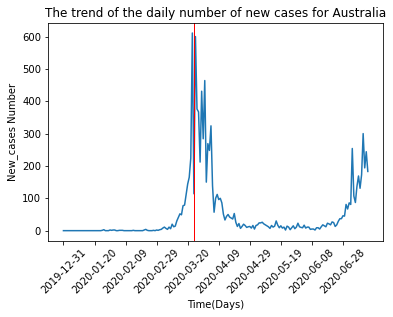

In [33]:
Aus = Data[Data['location']=='Australia']
Aus.reset_index(inplace=True)
plt.plot(Aus.date,Aus.new_cases)
plt.xticks(Aus.date[::20],rotation=45)
#referrence: https://blog.csdn.net/bubid/article/details/108023138?utm_medium=distribute.pc_aggpage_search_result.none-task-blog-2~all~first_rank_v2~rank_v25-3-108023138.nonecase&utm_term=matplot%E6%B7%BB%E5%8A%A0%E5%8F%82%E8%80%83%E7%BA%BF%20python
#for referrence line code
date=Aus['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Australia')

Text(0.5, 1.0, 'The trend of the daily number of new cases for China')

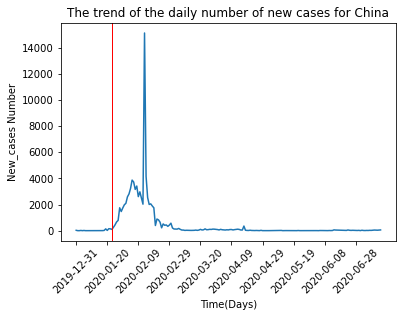

In [34]:
Ch = Data[Data['location']=='China']
Ch.reset_index(inplace=True)
Ch.drop(columns='index')

plt.plot(Ch.date,Ch.new_cases)
plt.xticks(Ch.date[::20],rotation=45)

date1=Ch['lockdown_date'][0]
plt.axvline(x=date1,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for China')

Text(0.5, 1.0, 'The trend of the daily number of new cases for France')

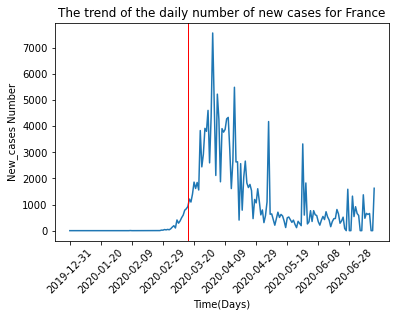

In [35]:
France = Data[Data['location']=='France']
France.reset_index(inplace=True)
France.drop(columns='index')

plt.plot(France.date,France.new_cases)
plt.xticks(France.date[::20],rotation=45)

date=France['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for France')

Text(0.5, 1.0, 'The trend of the daily number of new cases for Iran')

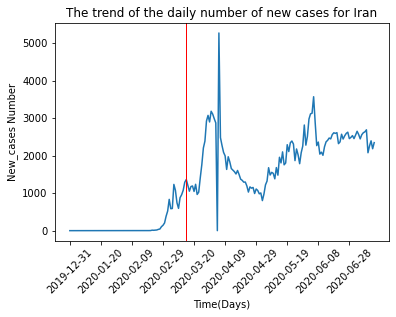

In [36]:
Iran = Data[Data['location']=='Iran']
Iran.reset_index(inplace=True)
Iran.drop(columns='index')

plt.plot(Iran.date,Iran.new_cases)
plt.xticks(Iran.date[::20],rotation=45)

date=Iran['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Iran')

Text(0.5, 1.0, 'The trend of the daily number of new cases for Italy')

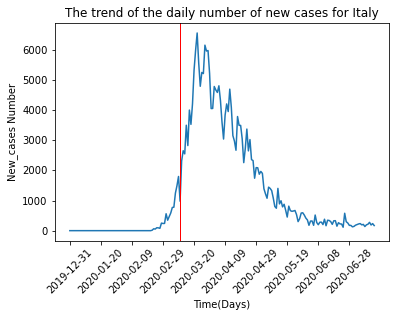

In [37]:
Italy = Data[Data['location']=='Italy']
Italy.reset_index(inplace=True)
Italy.drop(columns='index')

plt.plot(Italy.date,Italy.new_cases)
plt.xticks(Italy.date[::20],rotation=45)

date=Italy['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for Italy')

Text(0.5, 1.0, 'The trend of the daily number of new cases for ASpain')

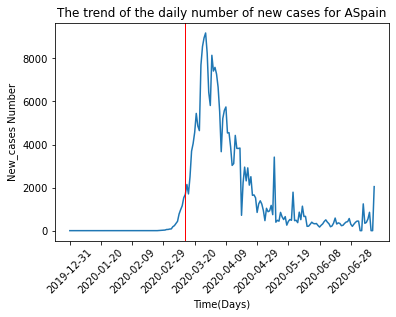

In [38]:
Spain = Data[Data['location']=='Spain']
Spain.reset_index(inplace=True)
Spain.drop(columns='index')

plt.plot(Spain.date,Spain.new_cases)
plt.xticks(Spain.date[::20],rotation=45)

date=Spain['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for ASpain')

Text(0.5, 1.0, 'The trend of the daily number of new cases for United Kingdom')

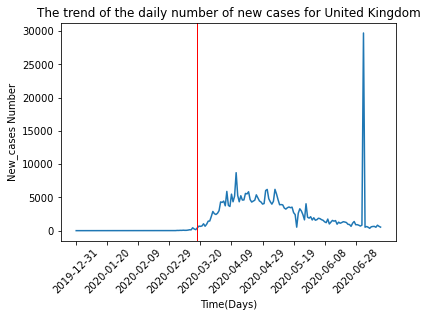

In [39]:
UK= Data[Data['location']=='United Kingdom']
UK.reset_index(inplace=True)
UK.drop(columns='index')

plt.plot(UK.date,UK.new_cases)
plt.xticks(UK.date[::20],rotation=45)


date=UK['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)

plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for United Kingdom')

Text(0.5, 1.0, 'The trend of the daily number of new cases for United States')

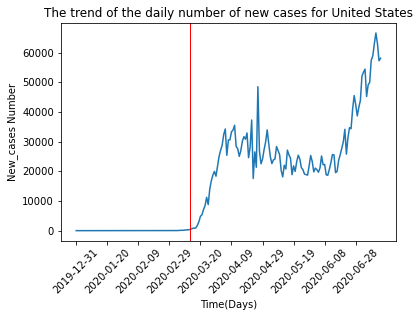

In [40]:
US= Data[Data['location']=='United States']
US.reset_index(inplace=True)
US.drop(columns='index')

plt.plot(US.date,US.new_cases)
plt.xticks(US.date[::20],rotation=45)#reference : https://blog.csdn.net/Du_Shuang/article/details/84138985

date=US['lockdown_date'][0]
plt.axvline(x=date,c='r',ls='-',lw=1)


plt.xlabel('Time(Days)')
plt.ylabel('New_cases Number')
plt.title('The trend of the daily number of new cases for United States')

### NB :

It is important to note that the peak usually occurs after the lockdown is put in place, because it takes some time for the lockdown to have an effect, and the decrease in cases will be reflected in the later data.
**Australia, and China** have been successful,their lockdowns are worked. The lockdown of **UK, Iran and US** doesn't work well. For **France,Italy and Spain**,it is OK,but not enough obvious.So,First lockdown is not similar for all countries.

**Australia**:The effect is remarkable.Small population: Easy to manage.Island country: Easy to control import from abroad
**China**:The effect is very obvious, because the blockade time is very early, so the difficulty is small. And the whole people cooperate with the government'policy.

 **UK**:
 London (CNN)The UK's vexed reaction to the coronavirus widespread got to be indeed more confounded, as government direction apparently at chances with itself rolled out over Britain, pushing the four countries of the UK advance apart.
The U.K., whose lawmakers were diverted by Brexit, is presently a case consider on how a postponed reaction can be disastrous indeed in case a nation contains a great wellbeing framework and an educated populace, Furness said. "In the U.K. individuals believe the government sufficient, they're compliant sufficient. But the government was completely snoozing at the switch," he said.
The early blockade was crucial, the British did not blockade early, misjudged the situation, and the late blockade did not work anymore.

**Frence**:Because of the cultural influence, some countries go out to buy food once a week, the *French* go out to buy food every day, so maybe their blockade is like there is no blockade, like from going out to buy food every day to once a week

**US**: Canada and the U.S.are huge decentralized leagues with independent subnational governments, and each reacted in an unexpected way. There was no across the country understanding on the seriousness of the emergency and the control procedure.Moreover, Americans, on the other hand, are broadly disobedient of government, and President Donald Trump's open difference with a few governors' statewide lockdowns irritated the situation. The last main factor I would see is many religious in America, Churches are high-risk places for infection, as they are large, closed spaces where people gather together to sing and talk.

**Iran**:

**Italy**: 
The average age of coronavirus patients who have died is 81. Italy, which has one the world s oldest populations, could be facing a higher death rate as a result of its elderly population.
"The positive impacts of Italy's coronavirus lockdown are however to be seen, the chief of a Milan hospital's seriously care unit (ICU) has told Euronews.." **The virus had probably been circulating for quite some time in Italy,and Italy is testing only the critical cases.**
So, it lockdown seems no effect.
 

**Spain**:1,The primary care system is “on the edge of collapse”.2,Critically ill patients are isolated at home

Isolation is different from isolation, and effective isolation policy can play a key role. For countries with no obvious effect of isolation, they have a common feature, that is, patients stay at home for isolation. Like a suggestion, some people unconsciously go out to exercise and increase the infection.



#reference:1,https://edition.cnn.com/2020/08/03/uk/covid-capital-of-europe-reopens-amid-confusion-and-chaos-intl-gbr/index.html

2,https://www.euronews.com/2020/03/25/coronavirus-positive-effects-of-italy-s-covid-19-lockdown-yet-to-be-seen
        
3,https://time.com/5799586/italy-coronavirus-outbreak/
        
4,https://www.theguardian.com/world/2020/aug/25/spain-warned-of-dire-impact-of-second-coronavirus-lockdown



### Question 3.  
Explore whether there is a relation between daily new case/death rate and the GDP of a country. To this aim, you need to calculate: 
*	The average of GDP of the countries, and then divide the countries into two groups, a group which its GDP is above the average GDP, and another group which its GDP is below the average GDP. We call the former group as "AboveGDP" and the later as "BelowGDP" from now onwards.
*	The daily new cases rate (new cases divided by population) for each country
*	The daily new death rate (new deaths divided by population) for each country 
        
Then, you need to create two line charts, one which shows the new case rate of groups "AboveGDP" and "BelowGDP"; and, another line chart to show the death rate of the two groups ("AboveGDP" and "BelowGDP").

    a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?
    b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?
    c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Does 
    the result of your visualisation is the same as the mentioned expectation? If no, why do you think the expectation is 
    different from the reality? 


In [41]:
Data = pd.read_csv('Task1DataSet.csv')
Data

,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,Australia,2019-12-31,0,0,0,0,44648.710,25499881.0,2020-03-24
1,Australia,2020-01-01,0,0,0,0,44648.710,25499881.0,2020-03-24
2,Australia,2020-01-02,0,0,0,0,44648.710,25499881.0,2020-03-24
3,Australia,2020-01-03,0,0,0,0,44648.710,25499881.0,2020-03-24
4,Australia,2020-01-04,0,0,0,0,44648.710,25499881.0,2020-03-24
...,...,...,...,...,...,...,...,...,...
1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647.0,2020-03-13
1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647.0,2020-03-13
1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647.0,2020-03-13
1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647.0,2020-03-13


In [42]:
aver_GDP = Data.gdp_per_capita.mean()
aver_GDP

35140.15650730207

In [43]:
AboveGDP = Data[Data['gdp_per_capita']>aver_GDP]
AboveGDP.reset_index(inplace=True)
AboveGDP

,index,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,0,Australia,2019-12-31,0,0,0,0,44648.710,25499881.0,2020-03-24
1,1,Australia,2020-01-01,0,0,0,0,44648.710,25499881.0,2020-03-24
2,2,Australia,2020-01-02,0,0,0,0,44648.710,25499881.0,2020-03-24
3,3,Australia,2020-01-03,0,0,0,0,44648.710,25499881.0,2020-03-24
4,4,Australia,2020-01-04,0,0,0,0,44648.710,25499881.0,2020-03-24
...,...,...,...,...,...,...,...,...,...,...
980,1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647.0,2020-03-13
981,1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647.0,2020-03-13
982,1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647.0,2020-03-13
983,1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647.0,2020-03-13


In [44]:
BelowGDP = Data[Data['gdp_per_capita']<=aver_GDP]
BelowGDP.reset_index(inplace=True)
BelowGDP

,index,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date
0,197,China,2019-12-31,27,27,0,0,15308.712,1.439324e+09,2020-01-23
1,198,China,2020-01-01,27,0,0,0,15308.712,1.439324e+09,2020-01-23
2,199,China,2020-01-02,27,0,0,0,15308.712,1.439324e+09,2020-01-23
3,200,China,2020-01-03,44,17,0,0,15308.712,1.439324e+09,2020-01-23
4,201,China,2020-01-04,44,0,0,0,15308.712,1.439324e+09,2020-01-23
...,...,...,...,...,...,...,...,...,...,...
585,1176,Spain,2020-07-09,253056,543,28401,5,34272.360,4.675478e+07,2020-03-14
586,1177,Spain,2020-07-10,253908,852,28403,2,34272.360,4.675478e+07,2020-03-14
587,1178,Spain,2020-07-11,253908,0,28403,0,34272.360,4.675478e+07,2020-03-14
588,1179,Spain,2020-07-12,253908,0,28403,0,34272.360,4.675478e+07,2020-03-14


In [45]:
AboveGDP = pd.DataFrame(AboveGDP)

In [46]:
AboveGDP['new_cases'].astype('float')
AboveGDP['new_cases_rate']=AboveGDP['new_cases']/AboveGDP['population']
AboveGDP['new_deaths_rate']=AboveGDP['new_deaths']/AboveGDP['population']
AboveGDP

,index,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date,new_cases_rate,new_deaths_rate
0,0,Australia,2019-12-31,0,0,0,0,44648.710,25499881.0,2020-03-24,0.000000,0.000000
1,1,Australia,2020-01-01,0,0,0,0,44648.710,25499881.0,2020-03-24,0.000000,0.000000
2,2,Australia,2020-01-02,0,0,0,0,44648.710,25499881.0,2020-03-24,0.000000,0.000000
3,3,Australia,2020-01-03,0,0,0,0,44648.710,25499881.0,2020-03-24,0.000000,0.000000
4,4,Australia,2020-01-04,0,0,0,0,44648.710,25499881.0,2020-03-24,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
980,1570,United States,2020-07-10,3118008,63004,133291,982,54225.446,331002647.0,2020-03-13,0.000190,0.000003
981,1571,United States,2020-07-11,3184633,66625,134097,806,54225.446,331002647.0,2020-03-13,0.000201,0.000002
982,1572,United States,2020-07-12,3247684,63051,134814,717,54225.446,331002647.0,2020-03-13,0.000190,0.000002
983,1573,United States,2020-07-13,3304942,57258,135205,391,54225.446,331002647.0,2020-03-13,0.000173,0.000001


In [47]:
BelowGDP = pd.DataFrame(BelowGDP)
BelowGDP['new_cases'].astype('float')
BelowGDP['new_cases_rate']=BelowGDP['new_cases']/BelowGDP['population']
BelowGDP['new_deaths_rate']=BelowGDP['new_deaths']/BelowGDP['population']
BelowGDP

,index,location,date,total_cases,new_cases,total_deaths,new_deaths,gdp_per_capita,population,lockdown_date,new_cases_rate,new_deaths_rate
0,197,China,2019-12-31,27,27,0,0,15308.712,1.439324e+09,2020-01-23,1.875881e-08,0.000000e+00
1,198,China,2020-01-01,27,0,0,0,15308.712,1.439324e+09,2020-01-23,0.000000e+00,0.000000e+00
2,199,China,2020-01-02,27,0,0,0,15308.712,1.439324e+09,2020-01-23,0.000000e+00,0.000000e+00
3,200,China,2020-01-03,44,17,0,0,15308.712,1.439324e+09,2020-01-23,1.181110e-08,0.000000e+00
4,201,China,2020-01-04,44,0,0,0,15308.712,1.439324e+09,2020-01-23,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
585,1176,Spain,2020-07-09,253056,543,28401,5,34272.360,4.675478e+07,2020-03-14,1.161379e-05,1.069409e-07
586,1177,Spain,2020-07-10,253908,852,28403,2,34272.360,4.675478e+07,2020-03-14,1.822273e-05,4.277637e-08
587,1178,Spain,2020-07-11,253908,0,28403,0,34272.360,4.675478e+07,2020-03-14,0.000000e+00,0.000000e+00
588,1179,Spain,2020-07-12,253908,0,28403,0,34272.360,4.675478e+07,2020-03-14,0.000000e+00,0.000000e+00


In [48]:
AboveGDP = AboveGDP.groupby('date').agg({'location':'count','new_cases_rate':'mean','new_deaths_rate':'mean'})
AboveGDP.reset_index(inplace=True)
AboveGDP

,date,location,new_cases_rate,new_deaths_rate
0,2019-12-31,5,0.000000,0.000000e+00
1,2020-01-01,5,0.000000,0.000000e+00
2,2020-01-02,5,0.000000,0.000000e+00
3,2020-01-03,5,0.000000,0.000000e+00
4,2020-01-04,5,0.000000,0.000000e+00
...,...,...,...,...
192,2020-07-10,5,0.000044,9.263594e-07
193,2020-07-11,5,0.000047,7.447139e-07
194,2020-07-12,5,0.000043,9.002525e-07
195,2020-07-13,5,0.000039,3.357343e-07


In [49]:
BelowGDP = BelowGDP.groupby('date').agg({'location':'count','new_cases_rate':'mean','new_deaths_rate':'mean'})
BelowGDP.reset_index(inplace=True)
BelowGDP

,date,location,new_cases_rate,new_deaths_rate
0,2019-12-31,3,6.252936e-09,0.000000e+00
1,2020-01-01,3,0.000000e+00,0.000000e+00
2,2020-01-02,3,0.000000e+00,0.000000e+00
3,2020-01-03,3,3.937034e-09,0.000000e+00
4,2020-01-04,3,0.000000e+00,0.000000e+00
...,...,...,...,...
192,2020-07-10,3,1.433559e-05,8.913165e-07
193,2020-07-11,3,8.986207e-06,5.635393e-07
194,2020-07-12,3,9.520808e-06,7.460943e-07
195,2020-07-13,3,2.326560e-05,7.912940e-07


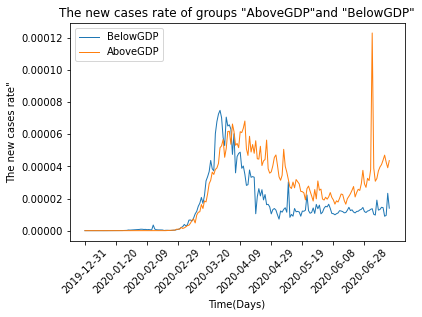

In [50]:
ln1,=plt.plot(BelowGDP.date,BelowGDP.new_cases_rate,linewidth=1)
ln2,=plt.plot(AboveGDP.date,AboveGDP.new_cases_rate,linewidth=1)
plt.xticks(AboveGDP.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('The new cases rate"')
plt.title('The new cases rate of groups "AboveGDP"and "BelowGDP"')
plt.legend(handles=[ln1,ln2],labels=['BelowGDP','AboveGDP']) 
# reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html?highlight=plt%20legend
#and https://blog.csdn.net/fei347795790/article/details/94326990

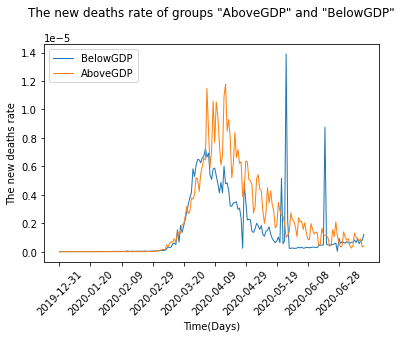

In [51]:
ln3,=plt.plot(BelowGDP.date,BelowGDP.new_deaths_rate,linewidth=1)
ln4,=plt.plot(AboveGDP.date,AboveGDP.new_deaths_rate,linewidth=1)
plt.xticks(AboveGDP.date[::20],rotation=45)
plt.xlabel('Time(Days)')
plt.ylabel('The new deaths rate')
plt.title('The new deaths rate of groups "AboveGDP" and "BelowGDP"',y=1.1)
#reference for plt.title (y=1.1):https://www.cnblogs.com/ddfs/p/11798597.html
plt.legend(handles=[ln3,ln4],labels=['BelowGDP','AboveGDP']) 

#### Explore whether there is a relation between daily new case/death rate and the GDP of a country:
    (brief describe)
        There are close connection between daily new case/death rate and the GDP of a country.Depending on the time,they all show the similar wave(the explorsive covid-19 new cases and deaths rate happends the period from 2020-3 to 2020-5).However,the "AboveGDP" countries have a higher new case/death rate as shown in the visualisation than the rate of "BelowGDP" countries. 
        there are two extreme value on blue line in the death rate chart, that means some country have a unnormal high death on that days.(we cannot see it is wrong),and it is same meaning(high new cases found) in the new_cases rate chart.



a) Which group ("AboveGDP" or "BelowGDP") usually had higher values of case rate?

    AboveGDP group had a higher values of case rate.

b) Which group ("AboveGDP" or "BelowGDP”) usually had higher values of the death rate?

    AboveGDP group had a higher values of death rate.

c) We would have expected that the case rate and death rate of group "AboveGDP" will be lower than group "BelowGDP". Does 
the result of your visualisation is the same as the mentioned expectation? If no, why do you think the expectation is 
different from the reality? 

        Unfortunately, the result of the visualisation is NOT the same as the mentioned expectation. Firstly, we have to know the "BelowGDP countries" include only three country(China,Iran,Spain)(small group can be effect easily by some data),whereas, "AboveGDP countries" groups have Australia', 'France', 'Italy', 'United Kingdom' and 'United States.The first hard-hit countries are China,Iran,and Spain. The countries in AboveGDP group are seen as "The Western laggards"()
        In the epidemic, we have seen China control the coronavirus very well from question1 and 2,so it will have a great positive affect on the visualisation of the small group which contains only three country(In Mathematical angle,have a large degree of reducing the average death/new cases rates. And large population of China maybe the one reason of a lower rate). Additionally, Italy,US and France that all in 'AboveGDP'group did have a not good performance, so that the reality maybe is not as too different as we expectation in this angle.
        Second point, the effective way to prevent the Covid-19 is lockdown(at least now), but the way will give itself negative effect(in economics,financial......).So many country cannot do it well because of the small country mass(or size of the country we can say). For example, the Covid-19 spreeds rapidly, China decided to lockdown two provinces(This action doesn't effect the country too much,because it has many other provinces which is keep running). However,in same spreeding speed(i.e. there are same area has to lockdown),Italy cannot lockdown  these area all although it has to. Because the area almost is the whole country, the country cannot run nomally if Italy lockdown itself totally. So some small developed countries which have a lower total GDP,instead of gdp_per_capita, may don't have a good way(like lockdown) to prevent themselves from Covid-19. That is the one of the reasons I think. Well, United States has a bigger mass but they won't lockdown expect some states so that they got a messy result.
        there are some other factors:
        Public awareness of prevention is weak in some developed country, they are focusing on other points rather than against the epidemic.
        Problems with procedures:
        ordinary people who have been infected with COVID-19 in the past are often treated with ordinary flu symptoms because they "don't like doctors," as has been the case with a number of patients in the current Outbreak in Italy.It also makes them "difficult to get medical treatment", turned into an outbreak time bomb.
        All in all, those are the main reason I think, gdp_per_capita indicator means the country may be in a high level all aspect but does't mean it must have a strong medical system or other things needed to prevent it from the epidemic.
    

In [52]:
#reference:
#   https://www.undp.org/content/undp/en/home/news-centre/news/2020/COVID19_Crisis_in_developing_countries_threatens_devastate_economies.html
#   https://www.cbc.ca/news/canada/covid-19-coronavirus-pandemic-countries-response-1.5617898         